# p02: Convergence of periodic spectral method

We repeat program P1 using periodic spectral method to compute derivative of

$$
u(x) = \exp(\sin(x)), \qquad x \in [-\pi,\pi]
$$

In [1]:
%config InlineBackend.figure_format='svg'
from scipy.linalg import toeplitz
from numpy import pi,arange,exp,sin,cos,zeros,tan,inf
from numpy.linalg import norm
from matplotlib.pyplot import figure,loglog,grid,xlabel,ylabel

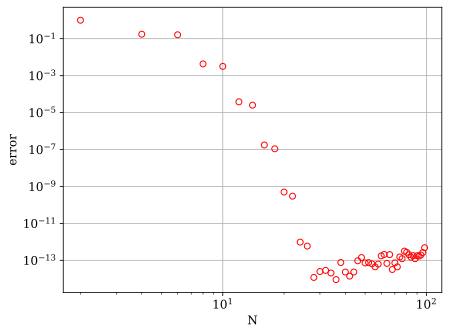

In [2]:
figure()
for N in range(2,100,2):
    h = 2.0*pi/N
    x = -pi + arange(1,N+1)*h
    u = exp(sin(x))
    uprime = cos(x)*u # Exact derivative
    col = zeros(N)
    col[1:] = 0.5*(-1.0)**arange(1,N)/tan(arange(1,N)*h/2.0)
    row = zeros(N); row[0] = col[0]; row[1:] = col[N-1:0:-1]
    D = toeplitz(col,row)
    error = norm(D.dot(u)-uprime,inf)
    loglog(N,error,'or')
    
grid(True); xlabel('N'); ylabel('error');

A Toepliz matrix is generated by its first column and first row. In the present case, we could also do

```python
D = toeplitz(col, -col)
```